In [1]:
from sklearn.svm import SVC, SVR
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

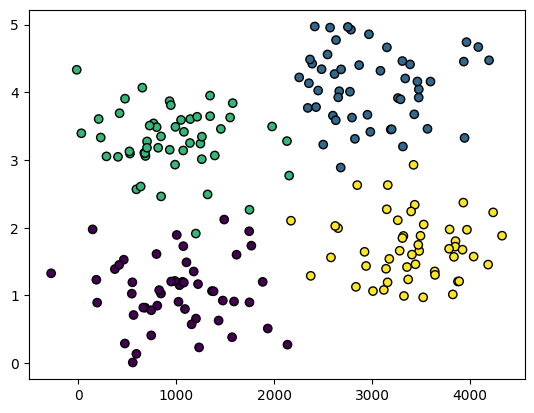

In [2]:
blob_centers = ([1, 1], [3, 4], [1, 3.3], [3.5, 1.8])
X, y = make_blobs(n_samples=200, 
                          centers=blob_centers, 
                          cluster_std=0.5,
                          random_state=0)

X[:, 0] *= 1000

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)

In [3]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X, y)

In [4]:
print("Веса между входным и скрытым слоем:")
print(clf.coefs_[0])
print("\nВеса между скрытым и выходным слоем:")
print(clf.coefs_[1])

Веса между входным и скрытым слоем:
[[-0.09809877  0.33667051 -0.82024119 -0.29720839 -0.56852789 -0.66056109]
 [-0.58903611 -0.31219238 -0.22424296  0.11423652 -0.18324369  0.37321781]]

Веса между скрытым и выходным слоем:
[[-0.51316658 -0.43365467  0.43189995  0.68148414]
 [-0.24370005  0.34328608  0.57835494  0.57889271]
 [-0.59713359 -0.67678056 -0.46609801  0.54011704]
 [-0.5769702  -0.10221922  0.75476969  0.00610289]
 [ 0.34285864 -0.25645017  0.33417991  0.47281254]
 [-0.7006119   0.35515533  0.80295119  0.33880635]]


In [5]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [-0.09809877 -0.58903611], 
0 1 [ 0.33667051 -0.31219238], 
0 2 [-0.82024119 -0.22424296], 
0 3 [-0.29720839  0.11423652], 
0 4 [-0.56852789 -0.18324369], 
0 5 [-0.66056109  0.37321781], 

1 0 [-0.51316658 -0.24370005 -0.59713359 -0.5769702   0.34285864 -0.7006119 ], 
1 1 [-0.43365467  0.34328608 -0.67678056 -0.10221922 -0.25645017  0.35515533], 
1 2 [ 0.43189995  0.57835494 -0.46609801  0.75476969  0.33417991  0.80295119], 
1 3 [0.68148414 0.57889271 0.54011704 0.00610289 0.47281254 0.33880635], 



In [6]:
print("Веса смещения для скрытого слоя:")
print(clf.intercepts_[0])
print("\nВеса смещения для выходного слоя:")
print(clf.intercepts_[1])

Веса смещения для скрытого слоя:
[-0.55752645  0.60978582 -0.8640854   0.33258994 -0.18652436  0.05696655]

Веса смещения для выходного слоя:
[-0.29413473  0.49414359 -0.60792984 -0.11888525]


In [8]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, clf.predict(X))

array([[ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50],
       [ 0,  0,  0, 50]])

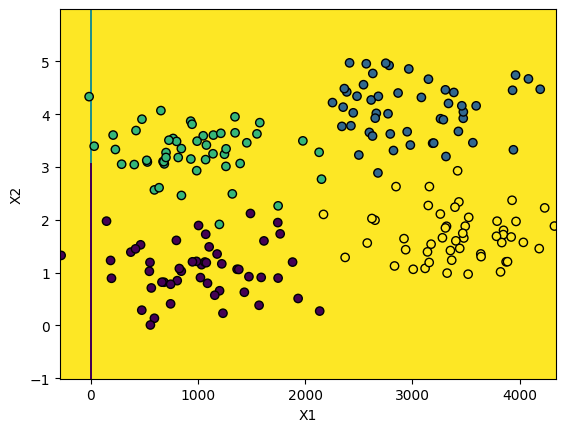

In [9]:
X0 = np.linspace(X[:, 0].min()-1,X[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X[:, 1].min()-1,X[:, 1].max()+1, X.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1).fit(X_scaled, y)

/home/fampkin/Desktop/ML/venv/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [13]:
confusion_matrix(y, clf.predict(X_scaled))

array([[22,  0, 11, 17],
       [ 0, 38,  0, 12],
       [ 0,  3, 45,  2],
       [ 0,  5,  0, 45]])

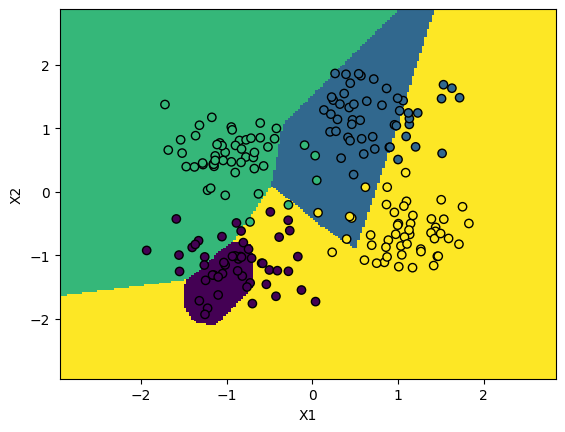

In [14]:
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

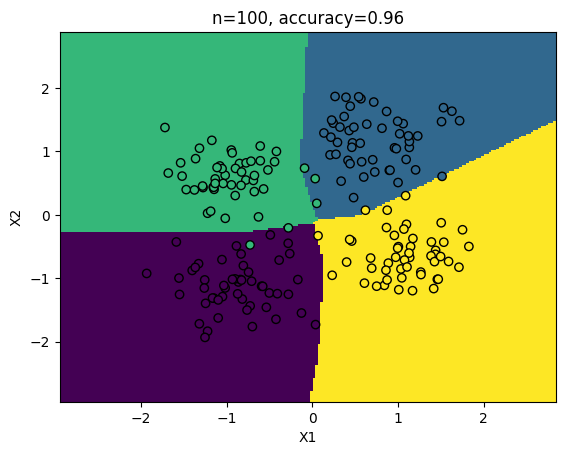

In [20]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(6,), 
                    random_state=1, max_iter=10000).fit(X_scaled, y)
X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
X0_grid, X1_grid = np.meshgrid(X0, X1)

y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
accuracy = clf.score(X_scaled, y)

plt.title(f'n={n}, accuracy={accuracy:.2f}')

plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# 1
Создайте однослойный перцептрон с 1, 2, 10 и 100 нейронами. Сравние их точность и сделайте вывод о достаточном количестве нейронов.

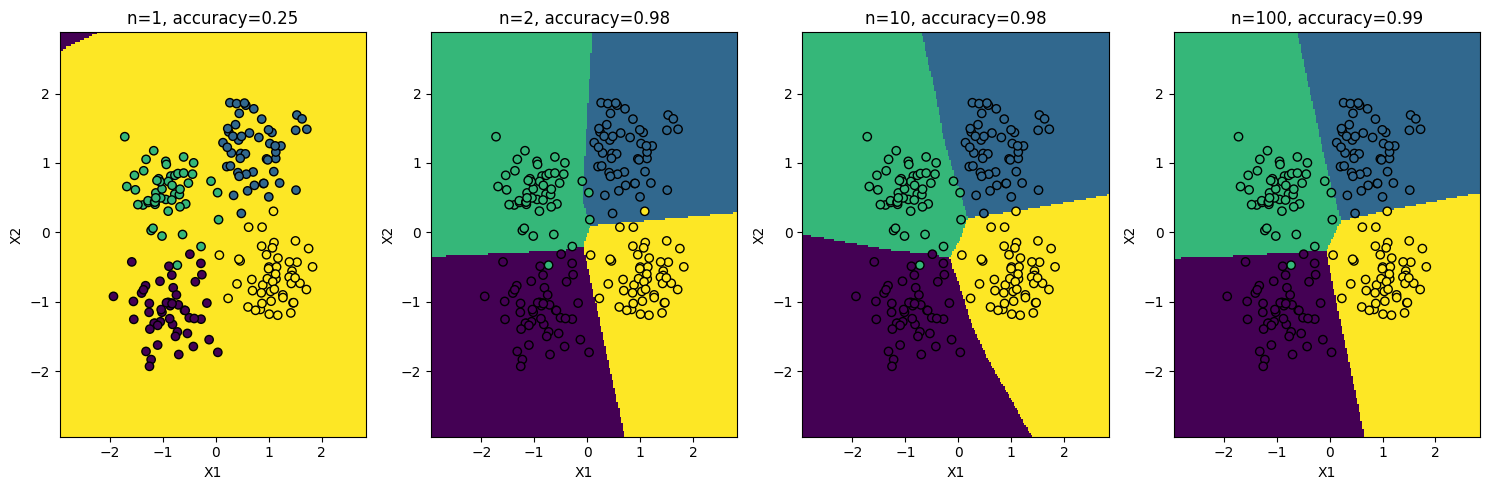

In [21]:
test_n = [1, 2, 10, 100]
fig, axes = plt.subplots(1, len(test_n), figsize=(15, 5))

for ax, n in zip(axes, test_n):
    plt.sca(ax)
    clf = MLPClassifier(hidden_layer_sizes=(n,), 
                    random_state=1, max_iter=10000).fit(X_scaled, y)
    X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
    X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)
    accuracy = clf.score(X_scaled, y)

    plt.title(f'n={n}, accuracy={accuracy:.2f}')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')


plt.tight_layout()
plt.show()

(5, 5, 5, 5, 5)

# 2
Создайте и оцените модель с двумя, тремя и десятью скрытыми слоями с одинаковым количеством нейронов. Сравните их точность и сделайте вывод о достаточном количестве слоев.


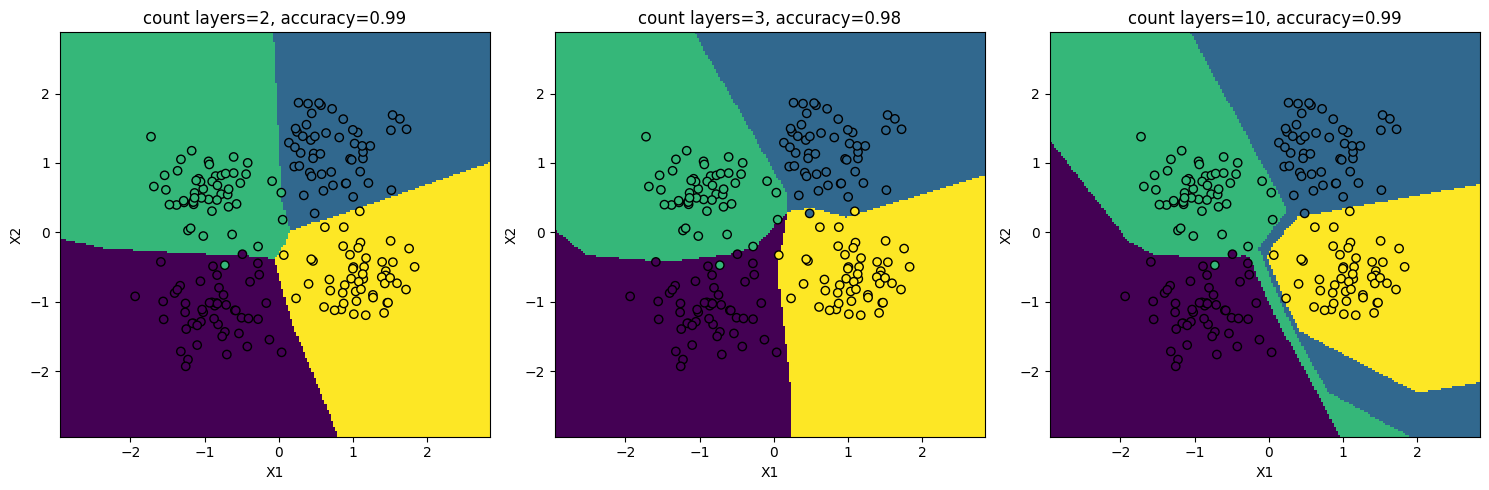

In [26]:
test_count_layers = [2, 3, 10]
fig, axes = plt.subplots(1, len(test_count_layers), figsize=(15, 5))

for ax, count_layers in zip(axes, test_count_layers):
    plt.sca(ax)
    clf = MLPClassifier(hidden_layer_sizes=(tuple([5]*count_layers)), 
                    random_state=1, max_iter=10000).fit(X_scaled, y)
    X0 = np.linspace(X_scaled[:, 0].min()-1,X_scaled[:, 0].max()+1, X_scaled.shape[0])
    X1 = np.linspace(X_scaled[:, 1].min()-1,X_scaled[:, 1].max()+1, X_scaled.shape[0])
    X0_grid, X1_grid = np.meshgrid(X0, X1)

    y_predict = clf.predict(np.c_[X0_grid.ravel(),X1_grid.ravel()]).reshape(X0_grid.shape)
    plt.pcolormesh(X0_grid, X1_grid, y_predict)
    accuracy = clf.score(X_scaled, y)

    plt.title(f'count layers={count_layers}, accuracy={accuracy:.2f}')
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y,  edgecolors='black',linewidth=1)
    plt.xlabel('X1')
    plt.ylabel('X2')


plt.tight_layout()
plt.show()

# 3
Для глубокой модели выведите веса всех нейронов на всех слоях. Выведите значения векторов весов смещения.


In [28]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(f"Layer {i} to {i+1}, Neuron {j}: {weights}")
    print()

for i in range(len(clf.intercepts_)):
    print(f"Intercepts for layer {i+1}: {clf.intercepts_[i]}")
    print()

Layer 0 to 1, Neuron 0: [ 0.06117673 -0.391689  ]
Layer 0 to 1, Neuron 1: [ 0.25734889 -1.32116341]
Layer 0 to 1, Neuron 2: [-0.88360264 -0.91322337]
Layer 0 to 1, Neuron 3: [-1.14075239 -0.58400075]
Layer 0 to 1, Neuron 4: [-0.52406197 -0.0192997 ]

Layer 1 to 2, Neuron 0: [ 0.00248396  0.73273059  0.02420754 -1.11780372 -0.45285605]
Layer 1 to 2, Neuron 1: [-0.32650381  1.08456259 -1.28144347 -0.62377376 -0.02603379]
Layer 1 to 2, Neuron 2: [ 0.00574868 -1.04416684 -0.11323223  0.96342533  0.78947267]
Layer 1 to 2, Neuron 3: [-0.66144246  0.58742913 -1.28076077 -0.38536783 -0.99943982]
Layer 1 to 2, Neuron 4: [-0.0902799   0.90254595  0.85147476  0.29844743  0.25504448]

Layer 2 to 3, Neuron 0: [-0.33645766 -1.13163363 -1.12393942 -0.73479904  0.57181018]
Layer 2 to 3, Neuron 1: [ 0.3130934  -0.07151747  0.1019926  -0.49249512  0.62949815]
Layer 2 to 3, Neuron 2: [-3.22083275e-04 -4.70597232e-03 -1.64344432e-02  1.81768909e-04
 -1.91772357e-23]
Layer 2 to 3, Neuron 3: [-0.90517191 -1

# 4
Постройте и оцените модель с большим количеством нейронов и слоев. Замерьте время выполнения обучения, сравните со временем обучения более простых моделей.


In [32]:
presets = [
    {
        "count_layers": 2,
        "count_neurons": 3
    },
    {
        "count_layers": 250,
        "count_neurons": 250
    }
]

for preset in presets:
    import time
    start_time = time.time()
    
    clf = MLPClassifier(hidden_layer_sizes=(tuple([preset["count_neurons"]]*preset["count_layers"])), 
                    random_state=1, max_iter=10000).fit(X_scaled, y)
    
    end_time = time.time()
    training_time = end_time - start_time
    accuracy = clf.score(X_scaled, y)
    
    print(f'Layers: {preset["count_layers"]}, Neurons per layer: {preset["count_neurons"]}, Training time: {training_time:.4f} seconds, Accuracy: {accuracy:.2f}')

Layers: 2, Neurons per layer: 3, Training time: 0.4451 seconds, Accuracy: 0.98
Layers: 250, Neurons per layer: 250, Training time: 42.9948 seconds, Accuracy: 0.25


# 5
Постройте и оцените модель классификации с помощью перцептрона на датасете, который вы использовали на контрольной по классификиации (если вы ее не выполняли, возьмите любой датасет из раздела "real world datasets" в библиотеке sklearn).


In [41]:
from sklearn.datasets import fetch_olivetti_faces
data = fetch_olivetti_faces(random_state=42)
X, y = data['data'], data['target']

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/fampkin/scikit_learn_data


In [46]:

clf = MLPClassifier(hidden_layer_sizes=(5, 8), 
                    random_state=1, max_iter=10000).fit(X_scaled, y)

accuracy = clf.score(X_scaled, y)
print(f"Accuracy on full dataset: {accuracy:.2f}")


Accuracy on full dataset: 0.92


# 6
Постройте и оцените модель регрессии с помощью перцептрона на датасете, который вы использовали на контрольной по регрессии.

In [48]:
from sklearn.datasets import fetch_openml
data = fetch_openml("laser")
X, y = data['data'], data['target']

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(8, 6, 4), 
                   random_state=1, max_iter=10000).fit(X_scaled, y)

r2_score = clf.score(X_scaled, y)
print(f"R^2 on full dataset: {r2_score:.2f}")

R^2 on full dataset: 0.98


In [57]:
from sklearn.metrics import mean_squared_error
y_pred = clf.predict(X_scaled)
mse = mean_squared_error(y, y_pred)
print(f"MSE on full dataset: {mse:.2f}")

MSE on full dataset: 41.71
